In [1]:
import os
import sys
import time
import glob
import io
import pytesseract
from pytesseract import Output
from PIL import Image, ImageDraw
import cv2
from pathlib import Path
import pandas as pd
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None
import layoutparser

In [2]:
nb_dir = '/home/naresh/anuvaad-BM/anuvaad/anuvaad-etl/anuvaad-extractor/block-merger/src'
sys.path.append(nb_dir)
sys.path.append(os.path.split(nb_dir)[0])

import config
import src.utilities.app_context as app_context
from src.utilities.primalaynet.infer import draw_box
app_context.init()
app_context.application_context = dict({'task_id': 'BM-DUMMY'})

#path to craft model, weight can be pulled form the production bracnh of repo
config.CRAFT_MODEL_PATH = "/home/naresh/Tarento/anuvaad/anuvaad-etl/anuvaad-extractor/block-merger/src/utilities/craft_pytorch/model/craft_mlt_25k.pth"
config.CRAFT_REFINE_MODEL_PATH   =  "/home/naresh/Tarento/anuvaad/anuvaad-etl/anuvaad-extractor/block-merger/src/utilities/craft_pytorch/model/craft_refiner_CTW1500.pth"
#config.LAYOUT_MODEL_PATH = "/home/naresh/anuvaad_BM_prima_model/model_final.pth"
#config.LAYOUT_CONFIG_PATH   =  "/home/naresh/anuvaad-BM/anuvaad/anuvaad-etl/anuvaad-extractor/block-merger/src/utilities/primalaynet/config.yaml"

from src.services.main import generate_response,break_blocks,merge_vertically,merge_horizontally,extract_images_and_text_regions

/home/naresh/layout/lib/python3.6/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


[2021-04-21 13:15:19,753] {geos.py:73} MainThread DEBUG in geos: Found GEOS DLL: <CDLL '/home/naresh/layout/lib/python3.6/site-packages/shapely/.libs/libgeos_c-a68605fd.so.1.13.1', handle 592dcb0 at 0x7fb5755ff5c0>, using it.
[2021-04-21 13:15:19,780] {geos.py:38} MainThread DEBUG in geos: Trying `CDLL(libc.so.6)`
[2021-04-21 13:15:19,782] {geos.py:55} MainThread DEBUG in geos: Library path: 'libc.so.6'
[2021-04-21 13:15:19,783] {geos.py:56} MainThread DEBUG in geos: DLL: <CDLL 'libc.so.6', handle 7fb627864000 at 0x7fb5755ff828>
Loading weights of refiner from checkpoint (./model/craft_refiner_CTW1500.pth)


In [3]:
import layoutparser as lp
model_primalaynet = lp.Detectron2LayoutModel('lp://PrimaLayout/mask_rcnn_R_50_FPN_3x/config',label_map = {1:"TextRegion", 2:"ImageRegion", 3:"TableRegion", 4:"MathsRegion", 5:"SeparatorRegion", 6:"OtherRegion"},extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5])


In [4]:
def draw_box(filepath,desired_width, desired_height,save_dir, df, color="green", save=False):
    image  = Image.open(filepath)
    image  = image.resize((desired_width, desired_height))
    draw   = ImageDraw.Draw(image)
    if type(df) is list:
        for i in df:
            for index, row in i.iterrows():
                left   = int(row['text_left'])
                right  = int(row['text_width'] + left)
                top    = int(row['text_top'])
                bottom = int(row["text_height"] + top)
                draw.rectangle(((left, top), (right,bottom)), outline=color,width=3)
    else:

        for index, row in df.iterrows():
            left   = int(row['text_left'])
            right  = int(row['text_width'] + left)
            top    = int(row['text_top'])
            bottom = int(row["text_height"] + top)
            draw.rectangle(((left, top), (right,bottom)), outline=color,width=3)
    save_filepath = os.path.join(save_dir, os.path.basename(filepath))
    if save:
        image.save(save_filepath)
    
    return image

In [5]:
#dir which contains the pdf file
input_dir = '/home/naresh/anuvaad-BM/anuvaad/anuvaad-etl/anuvaad-extractor/block-merger/src/notebooks/sample-data/'
filename = 'jd_exp03.pdf'
lang     = 'en'

In [6]:
[pdf_data,flags] = extract_images_and_text_regions(filename, input_dir,lang,page_layout='single_column')
[pdf_data,flags] = merge_horizontally([pdf_data,flags])
[pdf_data,flags] = merge_vertically([pdf_data,flags])
[pdf_data,flags] = break_blocks([pdf_data,flags])
#response        = generate_response([pdf_data,flags])

[2021-04-21 13:17:23,222] {loghandler.py:21} MainThread INFO in loghandler: document preprocessing started ===>
[2021-04-21 13:17:23,252] {loghandler.py:21} MainThread INFO in loghandler: created processing directories successfully /home/naresh/anuvaad-BM/anuvaad/anuvaad-etl/anuvaad-extractor/block-merger/src/notebooks/sample-data/jd_exp03_cefd01a0-a275-11eb-87c7-38baf82f7425
[2021-04-21 13:17:23,255] {loghandler.py:21} MainThread INFO in loghandler: filepath /home/naresh/anuvaad-BM/anuvaad/anuvaad-etl/anuvaad-extractor/block-merger/src/notebooks/sample-data/jd_exp03.pdf, working_dir /home/naresh/anuvaad-BM/anuvaad/anuvaad-etl/anuvaad-extractor/block-merger/src/notebooks/sample-data/jd_exp03_cefd01a0-a275-11eb-87c7-38baf82f7425
[2021-04-21 13:17:25,005] {loghandler.py:21} MainThread INFO in loghandler: Extracting xml of /home/naresh/anuvaad-BM/anuvaad/anuvaad-etl/anuvaad-extractor/block-merger/src/notebooks/sample-data/jd_exp03.pdf
[2021-04-21 13:17:26,173] {loghandler.py:21} MainThrea

/home/naresh/layout/lib/python3.6/site-packages/detectron2/modeling/roi_heads/fast_rcnn.py:124: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


[2021-04-21 13:17:32,040] {loghandler.py:21} MainThread INFO in loghandler: Starting header footer detetion with PRIMA
[2021-04-21 13:17:36,342] {loghandler.py:21} MainThread INFO in loghandler: Starting header footer detetion with PRIMA
[2021-04-21 13:17:40,208] {loghandler.py:21} MainThread INFO in loghandler: Starting header footer detetion with PRIMA
[2021-04-21 13:17:44,551] {loghandler.py:21} MainThread INFO in loghandler: Starting header footer detetion with PRIMA
[2021-04-21 13:17:48,605] {loghandler.py:21} MainThread INFO in loghandler: Starting header footer detetion with PRIMA
[2021-04-21 13:17:53,169] {loghandler.py:21} MainThread INFO in loghandler: Starting header footer detetion with PRIMA
[2021-04-21 13:17:57,998] {loghandler.py:21} MainThread INFO in loghandler: Starting header footer detetion with PRIMA
[2021-04-21 13:18:02,480] {loghandler.py:21} MainThread INFO in loghandler: Starting header footer detetion with PRIMA
[2021-04-21 13:18:07,130] {loghandler.py:21} Mai

In [7]:
flags

{'doc_class': 'class_1', 'page_layout': 'double_column'}

In [ ]:
def predict_primanet(image_path,bg_image_path,in_df,width_ratio,height_ratio):
    image1  = cv2.imread(image_path)
    image2  = cv2.imread(bg_image_path)
    image = image1[..., ::-1] 
    layout = model_primalaynet.detect(image)
    boxes,coords = draw_box(layout, in_df,width_ratio,height_ratio)

    final_coord= []
    for coord in coords:
        temp_dict={}
        temp_dict['text_left']=coord[0]; temp_dict['text_top']=coord[1]
        temp_dict['text_width']=coord[2]; temp_dict['text_height']=coord[3]
        #draw.rectangle(coord, width=3,outline='red')
        final_coord.append(temp_dict)
        cv2.rectangle(image1, (int(coord[0]),int(coord[1])), (int(coord[2]),int(coord[3])),(255,255,0),3)
        cv2.rectangle(image2, (int(coord[0]*width_ratio),int(coord[1]*height_ratio)), (int(coord[2]*width_ratio),int(coord[3]*height_ratio)),(255,255,0),3)

        cv2.imwrite("1.jpg",image1)
        cv2.imwrite("2.jpg",image2)

    return final_coord

In [ ]:
width_ratio = pdf_data['page_width'] / pdf_data['pdf_image_width']
height_ratio = pdf_data['page_height'] / pdf_data['pdf_image_height']
predict_primanet(img_filepath,pdf_bg_img_filepaths,to_check[0],width_ratio,height_ratio)

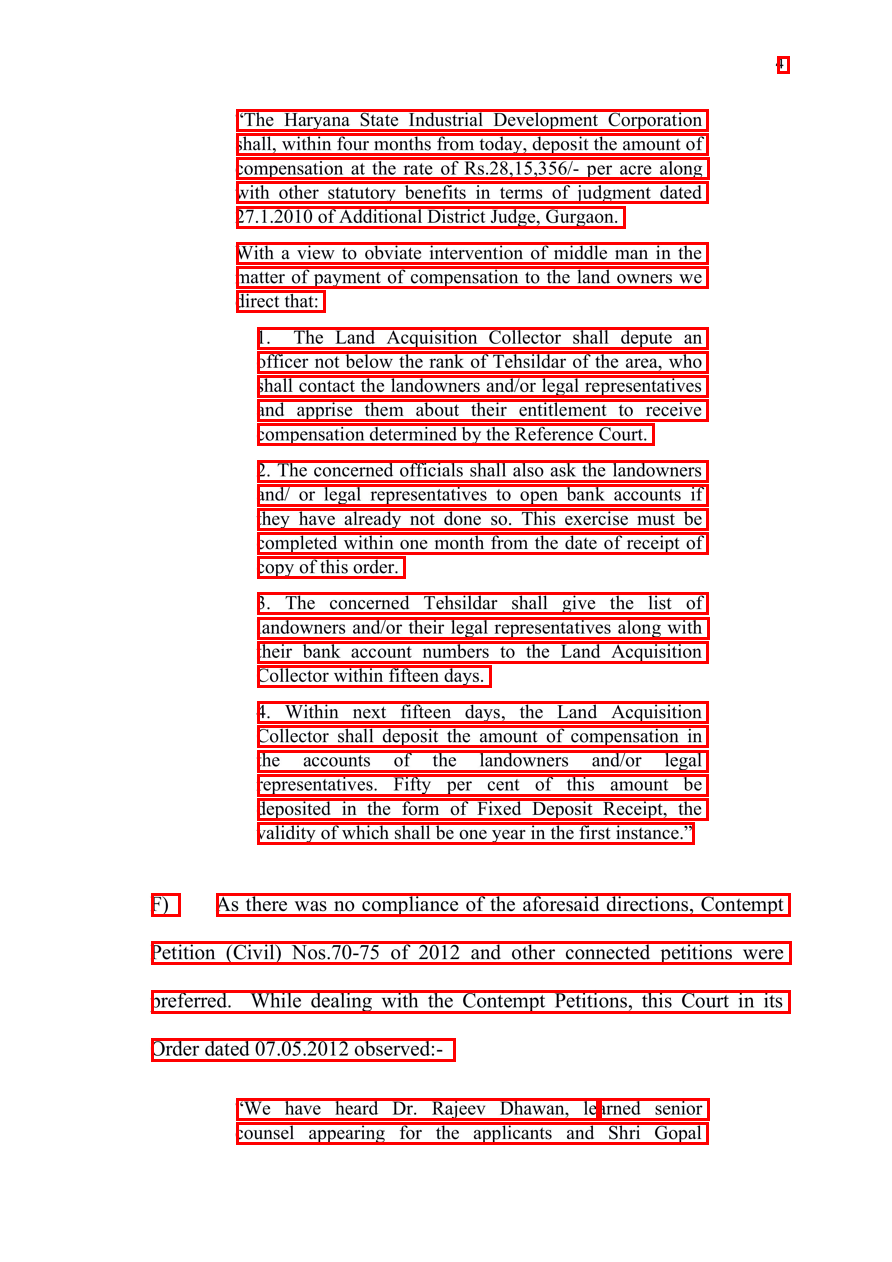

In [33]:
page_index = 3
to_check        = pdf_data['in_dfs']
#to_check_in_df        = pdf_data['v_dfs'][page_index]
img_filepath    = pdf_data['pdf_image_paths'][page_index]
pdf_bg_img_filepaths  = pdf_data['pdf_bg_img_filepaths'][page_index]
df              = to_check[page_index]

desired_width, desired_height = pdf_data['page_width'] , pdf_data['page_height']
draw_box(img_filepath,desired_width, desired_height, 'path',df, color="red", save=False)

In [34]:
#df.text.values

In [35]:
df

,xml_index,text_top,text_left,text_width,text_height,text,font_size,font_family,font_color,attrib,font_family_updated,font_size_updated
0,0,56,777,12,17,4,16,BCDEEE+Calibri,#000009,HEADER,Calibri,16
1,1,109,236,472,22,“The Haryana State Industrial Development ...,19,BCDGEE+TimesNewRomanPSMT,#000009,,TimesNewRomanPSMT,19
2,2,133,236,472,22,"shall, within four months from today, deposit ...",19,BCDFEE+TimesNewRomanPSMT,#000009,,TimesNewRomanPSMT,19
3,3,157,236,473,22,"compensation at the rate of Rs.28,15,356/...",19,BCDFEE+TimesNewRomanPSMT,#000009,,TimesNewRomanPSMT,19
4,4,181,236,472,22,with other statutory benefits in terms o...,19,BCDFEE+TimesNewRomanPSMT,#000009,,TimesNewRomanPSMT,19
5,5,206,236,389,22,"27.1.2010 of Additional District Judge, Gurgaon.",19,BCDFEE+TimesNewRomanPSMT,#000009,,TimesNewRomanPSMT,19
6,6,242,236,472,22,With a view to obviate intervention of ...,19,BCDFEE+TimesNewRomanPSMT,#000009,,TimesNewRomanPSMT,19
7,7,266,236,472,22,matter of payment of compensation to the land ...,19,BCDFEE+TimesNewRomanPSMT,#000009,,TimesNewRomanPSMT,19
8,8,290,236,89,22,direct that:,19,BCDFEE+TimesNewRomanPSMT,#000009,,TimesNewRomanPSMT,19
9,9,327,257,451,22,1. The Land Acquisition Collector shall...,19,BCDFEE+TimesNewRomanPSMT,#000009,,TimesNewRomanPSMT,19


In [ ]:
for i in to_check_in_df['children']:
    d =pd.read_json(i)
    print(d)
    print(d['children'])

In [ ]:
import numpy as np
p_df_image = draw_box(img_filepath,desired_width, desired_height, 'path',df, color="red", save=False)
sc_pdf_image = draw_box(img_filepath,desired_width, desired_height, 'path',to_check_in_df, color="red", save=False)
stiched_imag = np.hstack([np.array(p_df_image) ,np.array(sc_pdf_image)])
compare_image = Image.fromarray(stiched_imag)
compare_image.save("/home/naresh/1.jpg")